# Perceptron Neural Network

## Introduction

The **perceptron** is the simplest form of a neural network, introduced by Frank Rosenblatt in 1958. It serves as the fundamental building block for understanding more complex neural architectures and provides key insights into linear classification problems.

## Mathematical Foundation

### The Perceptron Model

A perceptron takes multiple input signals $x_1, x_2, \ldots, x_n$ and produces a single binary output. The mathematical model is defined as:

$$y = \phi\left(\sum_{i=1}^{n} w_i x_i + b\right) = \phi(\mathbf{w}^T \mathbf{x} + b)$$

where:
- $\mathbf{x} = [x_1, x_2, \ldots, x_n]^T$ is the input vector
- $\mathbf{w} = [w_1, w_2, \ldots, w_n]^T$ is the weight vector
- $b$ is the bias term
- $\phi$ is the activation function

### Activation Function

The classical perceptron uses the **Heaviside step function** as its activation:

$$\phi(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{if } z < 0 \end{cases}$$

This produces a binary classification: the perceptron "fires" (outputs 1) when the weighted sum exceeds the threshold.

### Decision Boundary

The perceptron defines a **hyperplane** in the input space that separates the two classes. For a 2D input space, the decision boundary is:

$$w_1 x_1 + w_2 x_2 + b = 0$$

This can be rewritten as:

$$x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}$$

## Learning Algorithm

### Perceptron Learning Rule

The perceptron learns by adjusting its weights based on classification errors. For each training sample $(\mathbf{x}^{(i)}, y^{(i)})$:

1. Compute the prediction: $\hat{y}^{(i)} = \phi(\mathbf{w}^T \mathbf{x}^{(i)} + b)$

2. Update weights if misclassified:
   $$\mathbf{w} \leftarrow \mathbf{w} + \eta (y^{(i)} - \hat{y}^{(i)}) \mathbf{x}^{(i)}$$
   $$b \leftarrow b + \eta (y^{(i)} - \hat{y}^{(i)})$$

where $\eta$ is the **learning rate**.

### Convergence Theorem

The **Perceptron Convergence Theorem** states that if the training data is **linearly separable**, the perceptron learning algorithm will converge to a solution in a finite number of steps. The number of updates is bounded by:

$$k \leq \frac{R^2 \|\mathbf{w}^*\|^2}{\gamma^2}$$

where:
- $R = \max_i \|\mathbf{x}^{(i)}\|$ is the maximum norm of input vectors
- $\mathbf{w}^*$ is any separating weight vector
- $\gamma = \min_i y^{(i)}(\mathbf{w}^{*T} \mathbf{x}^{(i)})$ is the margin

## Limitations

The perceptron can only solve **linearly separable** problems. The famous example of XOR demonstrates this limitation—no single hyperplane can separate the XOR truth table. This led to the development of **multi-layer perceptrons (MLPs)** which can learn non-linear decision boundaries.

## Implementation

We will implement a perceptron from scratch and demonstrate its learning capabilities on a linearly separable dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set random seed for reproducibility
np.random.seed(42)

In [4]:
class Perceptron:
    """
    Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Number of passes over the training dataset
    random_state : int
        Random number generator seed for weight initialization
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    b_ : float
        Bias unit after fitting
    errors_ : list
        Number of misclassifications in each epoch
    """
    
    def __init__(self, eta=0.1, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Fit training data.
        
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Training vectors
        y : array-like, shape = [n_samples]
            Target values (0 or 1)
        
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.0
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        """Calculate net input: z = w^T x + b"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## Generate Synthetic Dataset

We create a linearly separable dataset consisting of two classes with distinct cluster centers.

In [5]:
# Generate linearly separable data
n_samples = 100

# Class 0: centered at (-2, -2)
X_class0 = np.random.randn(n_samples // 2, 2) * 0.8 + np.array([-2, -2])
y_class0 = np.zeros(n_samples // 2)

# Class 1: centered at (2, 2)
X_class1 = np.random.randn(n_samples // 2, 2) * 0.8 + np.array([2, 2])
y_class1 = np.ones(n_samples // 2)

# Combine the data
X = np.vstack([X_class0, X_class1])
y = np.hstack([y_class0, y_class1])

# Shuffle the dataset
shuffle_idx = np.random.permutation(n_samples)
X = X[shuffle_idx]
y = y[shuffle_idx]

print(f"Dataset shape: {X.shape}")
print(f"Class distribution: {np.bincount(y.astype(int))}")

Dataset shape: (100, 2)
Class distribution: [50 50]


## Train the Perceptron

In [6]:
# Initialize and train the perceptron
ppn = Perceptron(eta=0.1, n_iter=20)
ppn.fit(X, y)

print(f"Learned weights: w1 = {ppn.w_[0]:.4f}, w2 = {ppn.w_[1]:.4f}")
print(f"Learned bias: b = {ppn.b_:.4f}")
print(f"Final accuracy: {np.mean(ppn.predict(X) == y) * 100:.1f}%")

Learned weights: w1 = 0.0627, w2 = 0.1918
Learned bias: b = 0.1000
Final accuracy: 100.0%


## Visualization

We create a comprehensive visualization showing:
1. The decision boundary and data points
2. The classification regions
3. The convergence of the learning algorithm

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Plot decision regions for a 2D dataset.
    """
    # Setup marker generator and color map
    markers = ('o', 's')
    colors = ('lightblue', 'lightcoral')
    cmap = ListedColormap(colors)
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.8, 
                   c=[colors[idx]],
                   marker=markers[idx], 
                   label=f'Class {int(cl)}',
                   edgecolor='black')

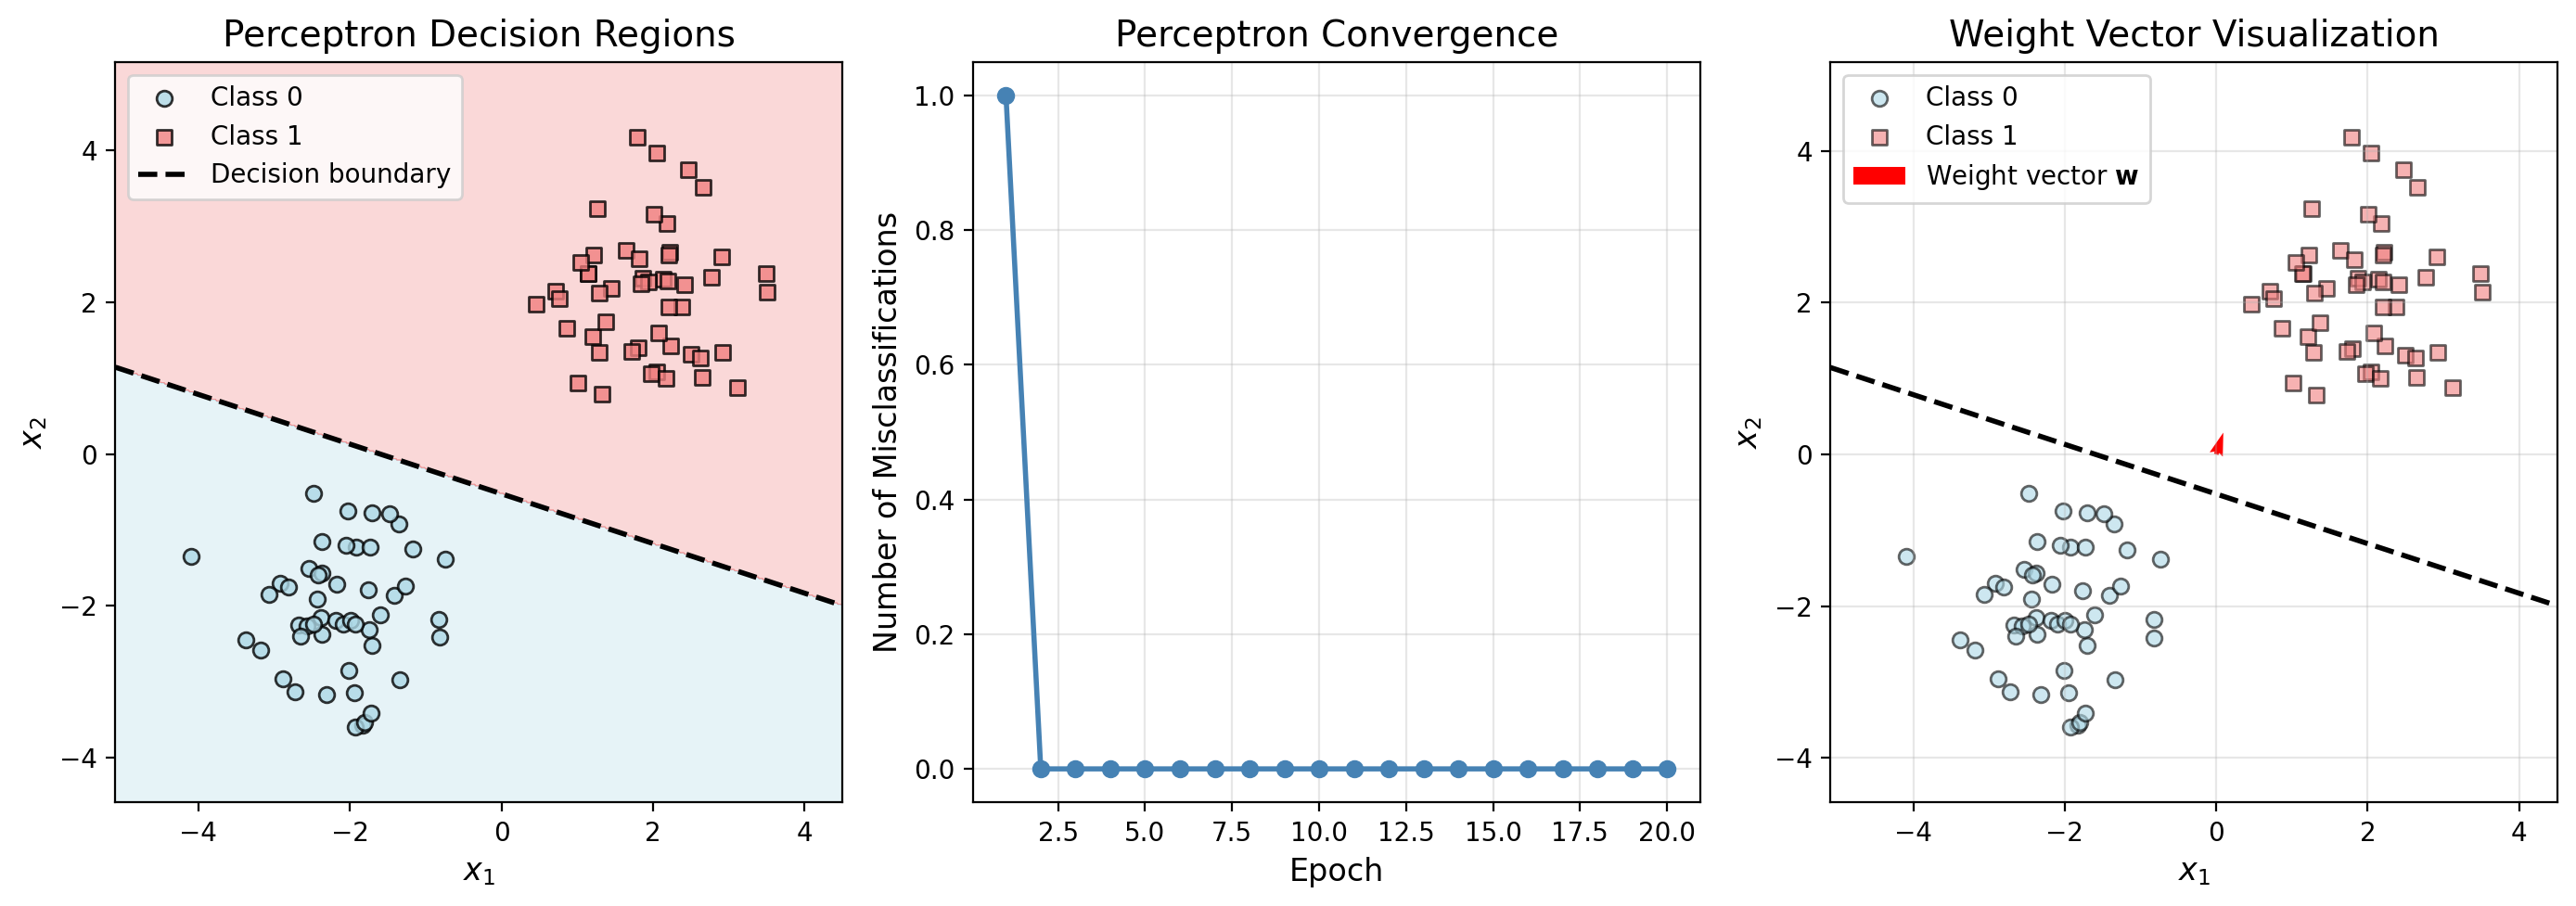


Plot saved to 'plot.png'


In [8]:
# Create the comprehensive visualization
fig = plt.figure(figsize=(14, 5))

# Plot 1: Decision boundary and regions
ax1 = fig.add_subplot(1, 3, 1)
plot_decision_regions(X, y, ppn)

# Plot the decision boundary line
x_boundary = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
y_boundary = -(ppn.w_[0] * x_boundary + ppn.b_) / ppn.w_[1]
ax1.plot(x_boundary, y_boundary, 'k--', linewidth=2, label='Decision boundary')

ax1.set_xlabel('$x_1$', fontsize=12)
ax1.set_ylabel('$x_2$', fontsize=12)
ax1.set_title('Perceptron Decision Regions', fontsize=14)
ax1.legend(loc='upper left')

# Plot 2: Convergence (errors per epoch)
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o', 
         color='steelblue', linewidth=2, markersize=6)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Number of Misclassifications', fontsize=12)
ax2.set_title('Perceptron Convergence', fontsize=14)
ax2.grid(True, alpha=0.3)

# Plot 3: Weight vector visualization
ax3 = fig.add_subplot(1, 3, 3)

# Plot data points
ax3.scatter(X[y == 0, 0], X[y == 0, 1], c='lightblue', marker='o', 
           edgecolor='black', alpha=0.6, label='Class 0')
ax3.scatter(X[y == 1, 0], X[y == 1, 1], c='lightcoral', marker='s', 
           edgecolor='black', alpha=0.6, label='Class 1')

# Plot the weight vector (perpendicular to decision boundary)
origin = np.array([0, 0])
weight_scale = 1.5
ax3.quiver(origin[0], origin[1], ppn.w_[0] * weight_scale, ppn.w_[1] * weight_scale,
          angles='xy', scale_units='xy', scale=1, color='red', 
          width=0.02, label=f'Weight vector $\\mathbf{{w}}$')

# Decision boundary
ax3.plot(x_boundary, y_boundary, 'k--', linewidth=2)

ax3.set_xlabel('$x_1$', fontsize=12)
ax3.set_ylabel('$x_2$', fontsize=12)
ax3.set_title('Weight Vector Visualization', fontsize=14)
ax3.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax3.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)

plt.tight_layout()

# Save the plot
plt.savefig('plot.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## XOR Problem Demonstration

To illustrate the fundamental limitation of a single-layer perceptron, we demonstrate its inability to solve the XOR problem.

In [9]:
# XOR dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR truth table

# Train perceptron on XOR
ppn_xor = Perceptron(eta=0.1, n_iter=100)
ppn_xor.fit(X_xor, y_xor)

# Check accuracy
predictions = ppn_xor.predict(X_xor)
accuracy = np.mean(predictions == y_xor) * 100

print("XOR Problem:")
print("-" * 30)
for i in range(len(X_xor)):
    print(f"Input: {X_xor[i]} | Target: {y_xor[i]} | Prediction: {predictions[i]}")
print("-" * 30)
print(f"Accuracy: {accuracy:.1f}%")
print(f"\nFinal errors per epoch: {ppn_xor.errors_[-5:]}")
print("\nThe perceptron fails to converge on the XOR problem,")
print("demonstrating that it cannot learn non-linearly separable patterns.")

XOR Problem:
------------------------------
Input: [0 0] | Target: 0 | Prediction: 1
Input: [0 1] | Target: 1 | Prediction: 0
Input: [1 0] | Target: 1 | Prediction: 0
Input: [1 1] | Target: 0 | Prediction: 0
------------------------------
Accuracy: 25.0%

Final errors per epoch: [4, 4, 4, 4, 4]

The perceptron fails to converge on the XOR problem,
demonstrating that it cannot learn non-linearly separable patterns.


## Summary

In this notebook, we have:

1. **Derived the mathematical model** of the perceptron, including its activation function and decision boundary

2. **Implemented the perceptron learning algorithm** from scratch using NumPy

3. **Trained the perceptron** on a linearly separable dataset and observed convergence

4. **Visualized** the decision regions, convergence behavior, and weight vector interpretation

5. **Demonstrated the XOR limitation**, showing why multi-layer networks are necessary for non-linear problems

### Key Takeaways

- The perceptron is a **linear classifier** that finds a hyperplane to separate classes
- It **converges** on linearly separable data but **fails** on non-linearly separable problems
- The **weight vector** is perpendicular to the decision boundary
- Despite its limitations, the perceptron laid the foundation for modern deep learning